<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [2]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [3]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [4]:
# Leitura do dataframe:
df = pd.read_csv('/total_9.csv')

In [5]:
df_total = df.copy()

In [7]:
df_total.head()



,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,cnae_secao,l_ind_1_mv,l_ind_2_mv,l_mc_1_mv,md1_o,md2_o,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Q,0,0,0,1.000000,0.398255,0.407658,0.114456,0.308309,0.453559,0.384122,0.111722,0.249513,0.393614,1.000000,0.044187,1.000000
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C,0,0,0,0.397077,0.689104,0.844217,0.000000,1.000000,0.809609,0.908028,0.000000,1.000000,1.000000,0.807546,1.000000,1.000000
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,M,0,0,0,0.000383,0.102683,0.377814,0.080514,0.216878,0.080427,0.362960,0.077037,0.172051,0.352255,0.003804,0.015874,0.062344
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,H,0,0,0,0.000577,0.513947,0.703152,0.000000,0.000000,0.402548,0.609998,0.000000,0.000000,1.000000,0.111085,0.013452,0.034155
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0,G,0,0,0,0.012644,0.143017,0.407120,0.039687,0.106904,0.168026,0.438292,0.292442,0.653124,0.421618,0.487878,1.000000,0.214273


In [8]:
df_total.set_index('id', inplace=True)

In [9]:
df_total.columns

Index(['cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',
       'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09',
       'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17',
       'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33',
       'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41',
       'ind42', 'ind43', 'target', 'cnae_secao', 'l_ind_1_mv', 'l_ind_2_mv',
       'l_mc_1_mv', 'md1_o', 'md2_o', 'md3_o', 'md4_o', 'md5_o', 'md7_o',
       'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o', 'mc3_o', 'mc4_o'],
      dtype='object')

Retirando algumas colunas para testar

In [10]:
df_total.drop(columns = ['cnae2','md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4'], inplace = True)

In [22]:
df_total.columns

Index(['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target', 'l_ind_1_mv', 'l_ind_2_mv',
       'l_mc_1_mv', 'md1_o', 'md2_o', 'md3_o', 'md4_o', 'md5_o', 'md7_o',
       'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o', 'mc3_o', 'mc4_o',
       'rf2_d', 'rf2_i', 'rf2_k', 'rf2_p', 'rf2_q', 'rf2_r', 'rf2_s', 'rf2_v',
       'rf2_y', 'rf2_z', 'cnae_secao_0', 'cnae_secao_A', 'cnae_secao_B',
       'cnae_secao_C', 'cnae_secao_D', 'cnae_secao_E', 'cnae_secao_F',
       'cnae_secao_G', 'cnae_secao_H', 'cnae_secao_I', 'cnae_secao_J',
       'cnae_secao_K', 'cnae_secao_L', 'cnae_secao_M', 'cnae_secao_N',
       'cnae_secao_P',

GET DUMMIES

In [16]:
df_total = pd.get_dummies(df_total)

In [23]:
df_X = df_total[df_total['target']!= 2]

In [24]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target'])

In [25]:
X_test = df_total[df_total['target']== 2].drop(columns= ['target'])

In [26]:
df_X.head()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,...,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.407658,0.114456,0.308309,0.453559,0.384122,0.111722,0.249513,0.393614,1.000000,0.044187,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.844217,0.000000,1.000000,0.809609,0.908028,0.000000,1.000000,1.000000,0.807546,1.000000,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.377814,0.080514,0.216878,0.080427,0.362960,0.077037,0.172051,0.352255,0.003804,0.015874,0.062344,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.703152,0.000000,0.000000,0.402548,0.609998,0.000000,0.000000,1.000000,0.111085,0.013452,0.034155,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.407120,0.039687,0.106904,0.168026,0.438292,0.292442,0.653124,0.421618,0.487878,1.000000,0.214273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


[**Python**] - Mostrar as primeiras 5 linhas:

In [27]:
X_test.head()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,...,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3411,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.429237,0.110482,0.297611,0.150525,0.425478,0.243343,0.623462,0.424363,0.044560,4.620425e-07,0.273459,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2177,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.430270,0.040200,0.000000,0.170702,0.403804,0.041478,0.000000,0.535900,1.000000,2.673173e-03,0.435962,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8400,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.368574,0.000000,0.000000,0.078222,0.372541,0.000000,0.000000,0.429919,0.052227,2.394228e-02,0.196417,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
464,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.3091,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.503878,1.000000,1.000000,1.000000,0.243786,1.000000,0.859042,3.538370e-01,0.926568,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6672,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.394364,0.101706,0.298525,0.125698,0.375346,0.094788,0.230897,0.374840,0.193310,0.000000e+00,0.115456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Pré-processamento e transformação dos dados

[**Python**] - Normalizar os dados - Getdummies()

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [28]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1, random_state = 22091980) #20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 88); X: Teste=  (1104, 88)


In [29]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [72]:
# Número de Neurônios na Input Layer:
N_I = 88

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 75

N_H2 = 75

N_H3=75

N_H4 = 200

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [73]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [74]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
#RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
#RN.add(Dropout(0.2))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 75)                6675      
_________________________________________________________________
dropout_3 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 75)                5700      
_________________________________________________________________
dropout_4 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 75)                5700      
_________________________________________________________________
dropout_5 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [75]:

Algoritmo_Opt = tf.keras.optimizers.Adam()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
#Metrics_Perf = tf.keras.metrics.binary_accuracy
#Metrics_Perf = 2 * (tf.keras.metrics.Recall() * tf.keras.metrics.Precision())/(tf.keras.metrics.Recall() + tf.keras.metrics.Precision())
#recall = tf.keras.metrics.Recall()
#prec = tf.keras.metrics.Precision()
#Metrics_Perf = 2 * (prec * recall) / (prec + recall)
#Metrics_Perf = tfa.metrics.F1Score(     num_classes= 1 , name=  'f1_score',threshold=0.9  )
#F1 = 2 * (precision * recall) / (precision + recall)
Metrics_Perf = tf.keras.metrics.binary_accuracy
RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [76]:

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 3ms/step - loss: 0.1687 - binary_accuracy: 0.7691 - val_loss: 0.1512 - val_binary_accuracy: 0.7880
Epoch 2/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1635 - binary_accuracy: 0.7690 - val_loss: 0.1499 - val_binary_accuracy: 0.7880
Epoch 3/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1610 - binary_accuracy: 0.7697 - val_loss: 0.1469 - val_binary_accuracy: 0.7880
Epoch 4/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1590 - binary_accuracy: 0.7702 - val_loss: 0.1497 - val_binary_accuracy: 0.7899
Epoch 5/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1577 - binary_accuracy: 0.7717 - val_loss: 0.1460 - val_binary_accuracy: 0.7917
Epoch 6/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1568 - binary_accuracy: 0.7742 - val_loss: 0.1447 - val_binary_accuracy: 0.7935
Epoch 7/100
311/311 [==============================] - 1s 

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [85]:
#from sklearn.datasets import make_classification
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

y_pred = RN.predict_classes(X_teste)

print(f1_score(y_teste, y_pred, average="macro"))


0.5440319397916571


In [78]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 972us/step - loss: 0.1479 - binary_accuracy: 0.7962


[0.14786700904369354, 0.7961956262588501]

In [94]:
print(f'F1: {f1_score(y_teste, RN.predict_classes(X_teste), average="macro")}')
F1=f1_score(y_teste, RN.predict_classes(X_teste), average="macro")
AC=accuracy_score(y_teste, RN.predict_classes(X_teste))

F1: 0.5440319397916571


In [81]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 936us/step - loss: 0.1471 - binary_accuracy: 0.7868


[0.14709985256195068, 0.7868213653564453]

In [92]:
print(f'F1: {f1_score(df_y, RN.predict_classes(df_X), average="macro")}')

F1: 0.55381107720369


In [83]:
RN.evaluate(X_treinamento, y_treinamento)

311/311 [==============================] - 0s 925us/step - loss: 0.1470 - binary_accuracy: 0.7858


[0.14701449871063232, 0.7857790589332581]

In [93]:
print(f'F1: {f1_score(y_treinamento, RN.predict_classes(X_treinamento), average="macro")}')

F1: 0.5547706065385212


A seguir, a matriz de confusão:

In [38]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


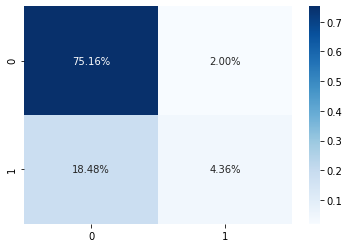

In [39]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [86]:
y_test = RN.predict_classes(X_test)


In [87]:
df_submit = pd.concat([pd.DataFrame(X_test.index,columns=['id']),pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)



In [88]:
df_submit.head()

,id,target
0,3411,False
1,2177,False
2,8400,False
3,464,False
4,6672,False


In [95]:
df_submit.to_csv(f'/PyLadies_NL_21_{round(F1,4)}_{round(AC,4)}.csv',index = False, sep = ',')

In [89]:
df_submit['target'].value_counts()

False    936
True      64
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.

### Salvar a Rede Neural

In [96]:
# Save the weights
RN.save('/RN_21.h5')